## 特徵選擇/範例二: Recursive feature elimination

http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html

本範例主要目的是減少特徵數量來提升機器學習之預測準確度。
主要方法是去不斷去剔除與資料分類關係轉少之特徵，來篩選特徵數目至指定數目。

1. 以`load_digits`取得內建的數字辨識資料
2. 以`RFE`疊代方式刪去相對不具有目標影響力的特徵

### (一)產生內建的數字辨識資料

In [16]:
# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

數位數字資料是解析度為8*8的手寫數字影像，總共有1797筆資料。預設為0~9十種數字類型，亦可由n_class來設定要取得多少種數字類型。

輸出的資料包含
1. ‘data’, 特徵資料(1797*64)
2. ‘images’, 影像資料(1797\*8*8)
3. ‘target’, 資料標籤(1797)
4. ‘target_names’, 選取出的標籤列表(與n_class給定的長度一樣)
5. ‘DESCR’, 此資料庫的描述

可以參考Classification的Ex1

### (二)以疊代方式計算模型

`RFE`以排除最不具目標影響力的特徵，做特徵的影響力排序。並且將訓練用的特徵挑選至`n_features_to_select`所給定的特徵數。因為要看每一個特徵的影響力排序，所以我們將`n_features_to_select`設定為1，一般會根據你所知道的具有影響力特徵數目來設定該參數。而`step`代表每次刪除較不具影響力的特徵數目，因為本範例要觀察每個特徵的影響力排序，所以也是設定為1。若在實際應用時，特徵的數目較大，可以考慮將`step`的參數設高一點。

In [17]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

可以用方法`ranking_`來看輸入的特徵權重關係。而方法`estimator_`可以取得訓練好的分類機狀態。比較特別的是當我們核函數是以線性來做分類時，`estimator_`下的方法`coef_`即為特徵的分類權重矩陣。權重矩陣的大小會因為`n_features_to_select`與資料的分類類別而改變，譬如本範例是十個數字的分類，並選擇以一個特徵來做分類訓練，就會得到45*1的係數矩陣，其中45是從分類類別所需要的判斷式而來，與巴斯卡三角形的第三層數正比。

### (三)畫出每個像素所對應的權重順序

取得每個像素位置對於判斷數字的權重順序後，我們把權重順序依照顏色畫在對應的位置，數值愈大代表該像素是較不重要之特徵。由結果來看，不重要之特徵多半位於影像之外圍部份。而所有的訓練影像中，外圍像素多半為空白，因此較不重要。

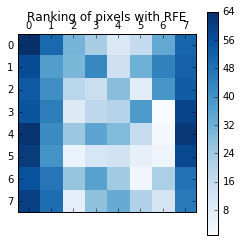

In [18]:
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

### (四)原始碼
Python source code: [plot_rfe_digits.py](http://scikit-learn.org/stable/_downloads/plot_rfe_digits.py)

In [ ]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()